In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 60)
pd.set_option("display.width", 1000)

In [5]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [62]:
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)

In [34]:
def check_df(dataframe, head=5):
    print("##### Shape #####" )
    print(dataframe.shape)
    print("##### Head #####" )
    print(dataframe.head(head))
    print("##### Tail #####" )
    print(dataframe.tail(head))
    print("##### Info #####" )
    print(dataframe.info())

In [ ]:
check_df(test_df)

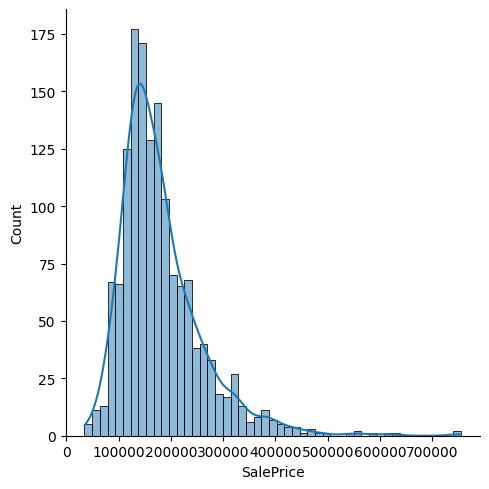

In [48]:
sns.displot(train_df["SalePrice"], kde=True);

In [50]:
train_df["SalePrice"].skew()

np.float64(1.8828757597682129)

In [49]:
train_df["SalePrice"].describe([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

In [159]:
def grab_col_names(df, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if df[col].dtype == 'O']
    num_but_cat = [col for col in df.columns if df[col].dtype != 'O' and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if df[col].dtype == 'O' and df[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Categorical columns: {cat_cols}")
    print(f"Numerical columns: {num_cols}")
    print(f"High cardinality columns: {cat_but_car}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(train_df)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']
Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'Gar

## Numerical Columns Analysis

In [87]:
def num_cols_analysis(df, column, plot=True):
    print(f"##### {column} #####")
    print(df[column].describe([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]))
    
    if plot:
        plt.hist(df[column])
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

In [ ]:
for col in num_cols:  
    num_cols_analysis(train_df, col)

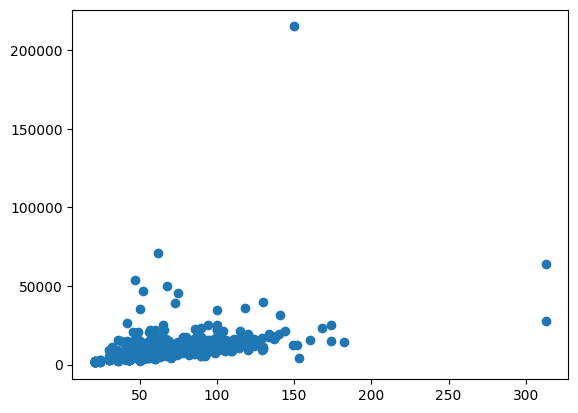

In [ ]:
plt.scatter(x=train_df["LotFrontage"], y=train_df["LotArea"]);

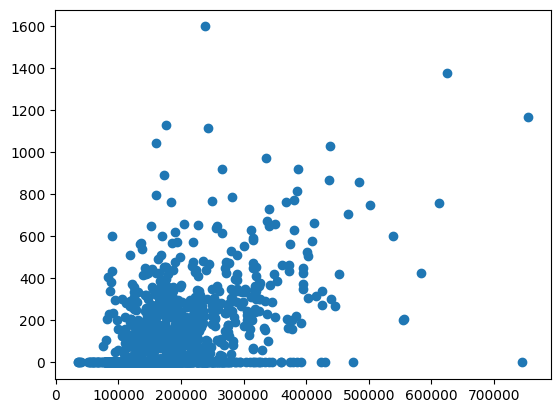

In [148]:
plt.scatter(train_df["SalePrice"], train_df["MasVnrArea"]);

In [ ]:
train_df.loc[train_df["LotFrontage"] > 300] # remove 935 and 1299

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
train_df.loc[train_df["LotArea"] > 200000] # remove 314

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [ ]:
train_df.loc[train_df["MasVnrArea"] > 1500] # remove 298

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [ ]:
train_df.loc[train_df["BsmtFinSF1"] > train_df["BsmtFinSF1"].quantile(0.99)]["BsmtFinSF1"].sort_values(ascending=False) # remove 1299

Id
1299    5644
524     2260
899     2188
1183    2096
179     1904
71      1880
54      1810
441     1767
665     1721
655     1696
988     1646
826     1636
327     1619
455     1606
252     1573
Name: BsmtFinSF1, dtype: int64

In [113]:
for col in num_cols:
    print(train_df.loc[train_df[col] > train_df[col].quantile(0.99)][col].sort_values(ascending=False))

Series([], Name: MSSubClass, dtype: int64)
Id
1299    313.0
935     313.0
1128    182.0
198     174.0
232     174.0
1108    168.0
1183    160.0
1338    153.0
1212    152.0
314     150.0
910     149.0
808     144.0
Name: LotFrontage, dtype: float64
Id
314     215245
336     164660
250     159000
707     115149
452      70761
1299     63887
1397     57200
770      53504
458      53227
385      53107
54       50271
662      46589
849      45600
524      40094
272      39104
Name: LotArea, dtype: int64
Series([], Name: OverallQual, dtype: int64)
Id
379    2010
Name: YearBuilt, dtype: int64
Id
158    2010
379    2010
820    2010
856    2010
899    2010
988    2010
Name: YearRemodAdd, dtype: int64
Id
298     1600.0
1170    1378.0
692     1170.0
116     1129.0
71      1115.0
809     1047.0
59      1031.0
982      975.0
225      922.0
518      921.0
756      894.0
350      870.0
799      860.0
826      816.0
1299     796.0
Name: MasVnrArea, dtype: float64
Id
1299    5644
524     2260
899     2

In my opinion, 1299, 314, 298, 347, 692, 323 and 496 are huge outliers that should be removed from the dataset.

In [150]:
train_df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

## Categorical Columns Analysis

In [166]:
def cat_cols_analysis(df, col, plot=True):
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Ratio": df[col].value_counts() * 100 / len(df)}))
        
    if plot:
        sns.countplot(x=df[col], data=df)
        plt.show(block=True)

In [ ]:
for col in cat_cols:   
    cat_cols_analysis(train_df, col)

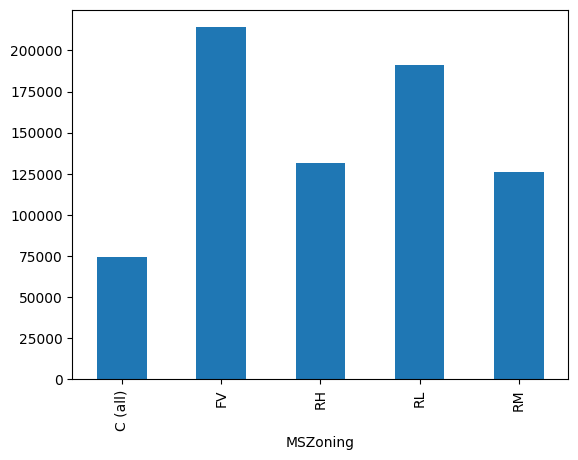

In [175]:
train_df.groupby("MSZoning")["SalePrice"].mean().plot(kind="bar");

## Missing Value Analysis

In [216]:
def missing_values_table(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (
        df[na_columns].isnull().sum() / df.shape[0] * 100
    ).sort_values(ascending=False)

    missing_df = pd.concat(
        [n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"]
    )
    print(missing_df, end="\n")
    return missing_df

In [234]:
def visualize_missing_data(missing_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y=missing_df["ratio"])
    plt.title("Missing Data Ratio per Column")
    plt.xlabel("Columns")
    plt.ylabel("Missing Ratio (%)")
    plt.xticks(rotation=90)  
    plt.show()

In [235]:
missing_train_df = missing_values_table(train_df)
missing_test_df = missing_values_table(test_df)

              n_miss  ratio
PoolQC          1453  99.52
MiscFeature     1406  96.30
Alley           1369  93.77
Fence           1179  80.75
MasVnrType       872  59.73
FireplaceQu      690  47.26
LotFrontage      259  17.74
GarageType        81   5.55
GarageYrBlt       81   5.55
GarageFinish      81   5.55
GarageQual        81   5.55
GarageCond        81   5.55
BsmtExposure      38   2.60
BsmtFinType2      38   2.60
BsmtQual          37   2.53
BsmtCond          37   2.53
BsmtFinType1      37   2.53
MasVnrArea         8   0.55
Electrical         1   0.07
              n_miss  ratio
PoolQC          1456  99.79
MiscFeature     1408  96.50
Alley           1352  92.67
Fence           1169  80.12
MasVnrType       894  61.27
FireplaceQu      730  50.03
LotFrontage      227  15.56
GarageQual        78   5.35
GarageCond        78   5.35
GarageYrBlt       78   5.35
GarageFinish      78   5.35
GarageType        76   5.21
BsmtCond          45   3.08
BsmtQual          44   3.02
BsmtExposure      44

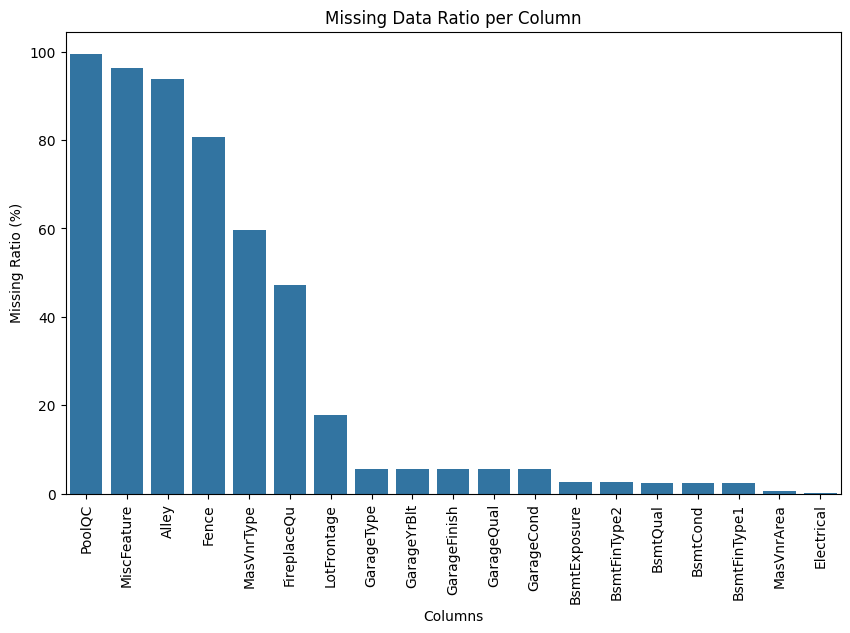

In [236]:
visualize_missing_data(missing_train_df)

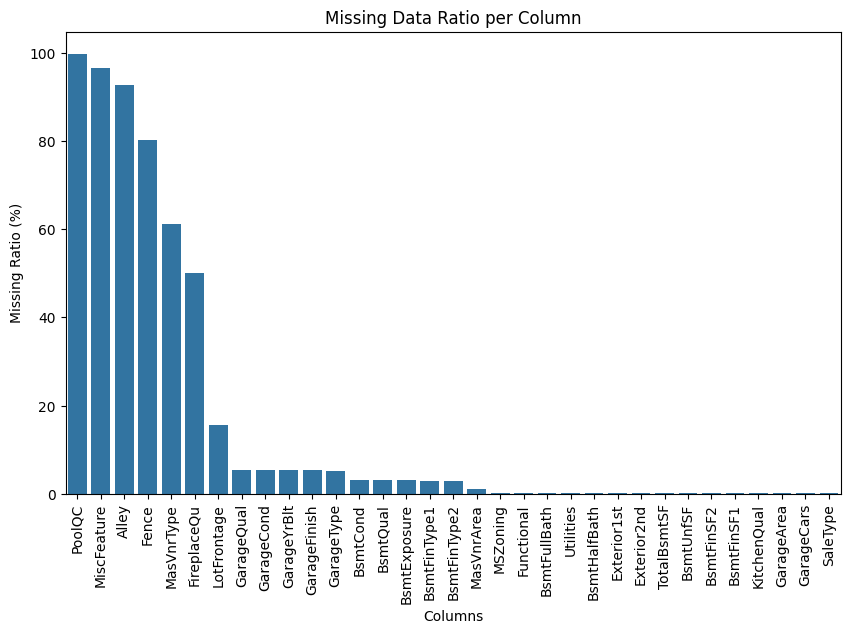

In [237]:
visualize_missing_data(missing_test_df)